In [14]:
# ============  Regressor  ============================\n",
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


#============== Metric ===========================================
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# ============= Normalization ===================
from sklearn.preprocessing import MinMaxScaler

# ============= Splitting =======================
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import KFold

# ===============================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# ======================= Thiophene dataset =============================================
data = pd.read_excel(r'Data_corrosion_11.xlsx')
data.head()


,No,IE,Hammett Constant,Total Dipole Moment (e Å),HOMO (eV),LUMO (eV),Energy gap (eV),Surface Area (Å2),Molecular Volume (Å3),NN Predict
0,1,68.4,-0.200,1.861,-8.747,-0.4148,8.3322,138.161,106.2890,66.39
1,2,60.2,-0.170,0.453,-8.497,-0.1543,8.3427,128.185,97.2008,62.38
2,3,55.5,-0.069,0.812,-8.550,-0.1670,8.3830,128.348,97.4409,58.94
3,4,35.5,0.000,0.376,-8.709,-0.1924,8.5166,105.265,80.0180,43.57
4,5,60.4,0.226,1.428,-8.809,-0.5235,8.2855,120.939,93.7375,59.26


In [16]:
# Preprosessing
data.columns

Index(['No', 'IE', 'Hammett Constant', 'Total Dipole Moment (e Å)',
       'HOMO (eV)', 'LUMO (eV)', 'Energy gap (eV)', 'Surface Area (Å2)',
       'Molecular Volume (Å3)', 'NN Predict'],
      dtype='object')

In [17]:
# Preprosessing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   No                         11 non-null     int64  
 1   IE                         11 non-null     float64
 2   Hammett Constant           11 non-null     float64
 3   Total Dipole Moment (e Å)  11 non-null     float64
 4   HOMO (eV)                  11 non-null     float64
 5   LUMO (eV)                  11 non-null     float64
 6   Energy gap (eV)            11 non-null     float64
 7   Surface Area (Å2)          11 non-null     float64
 8   Molecular Volume (Å3)      11 non-null     float64
 9   NN Predict                 11 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 1008.0 bytes


In [18]:
# see if any data has missing or null values
print(data.isnull().any())

No                           False
IE                           False
Hammett Constant             False
Total Dipole Moment (e Å)    False
HOMO (eV)                    False
LUMO (eV)                    False
Energy gap (eV)              False
Surface Area (Å2)            False
Molecular Volume (Å3)        False
NN Predict                   False
dtype: bool


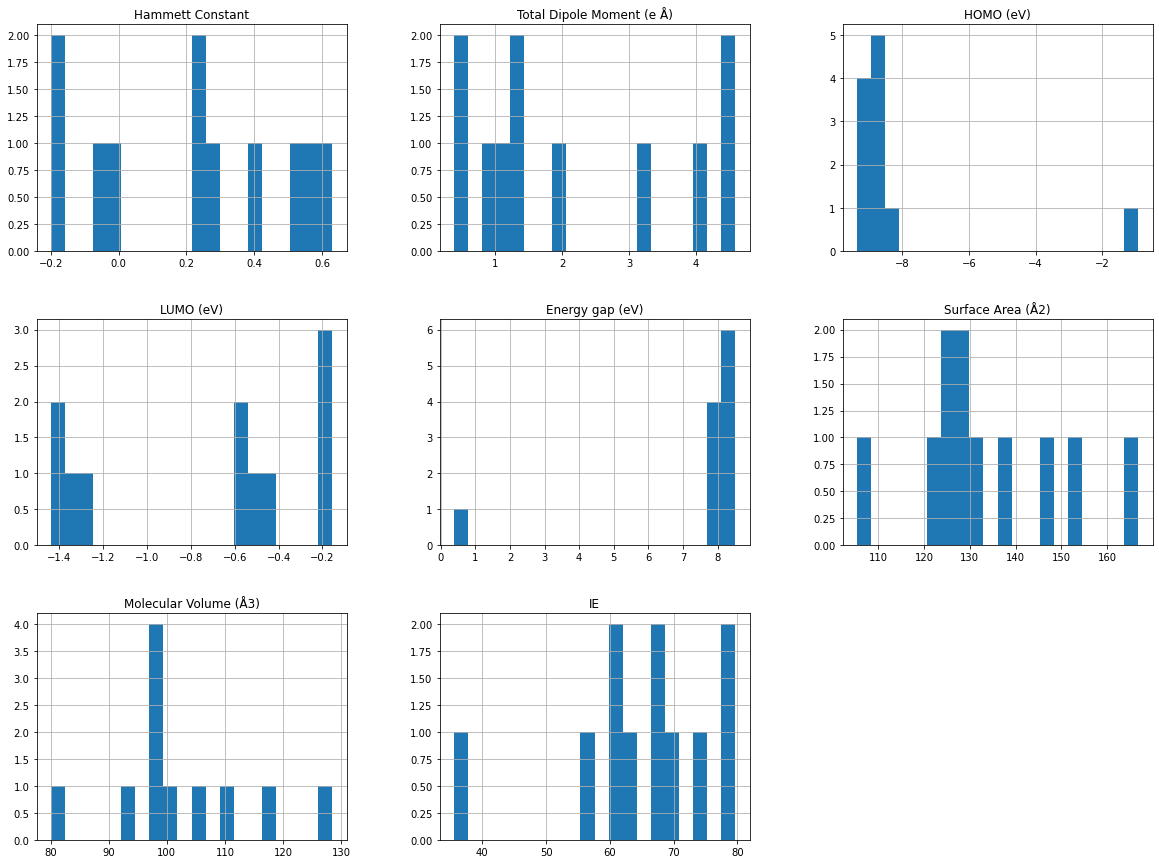

In [19]:
# Histogram before adding virtual samples
# =========================================
data_XY=data[['Hammett Constant','Total Dipole Moment (e Å)','HOMO (eV)','LUMO (eV)','Energy gap (eV)','Surface Area (Å2)',
               'Molecular Volume (Å3)','IE']]
%matplotlib inline
import matplotlib.pyplot as plt
data_XY.hist(bins=20, figsize=(20,15))
plt.show()

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Distribution of Energy LUMO')

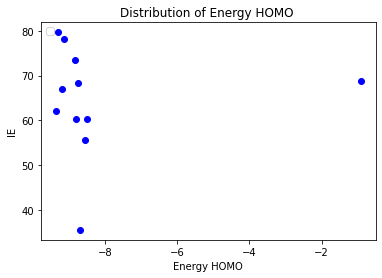

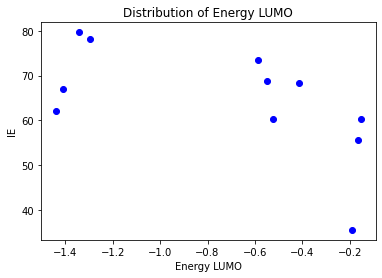

In [8]:
# Plot HOMO and LUMO vs IE
HOMO = data['HOMO (eV)'].values
LUMO = data['LUMO (eV)'].values
IE   = data['IE'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Energy HOMO")
plt.title('Distribution of Energy HOMO ')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
#plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Energy LUMO")
plt.title('Distribution of Energy LUMO')


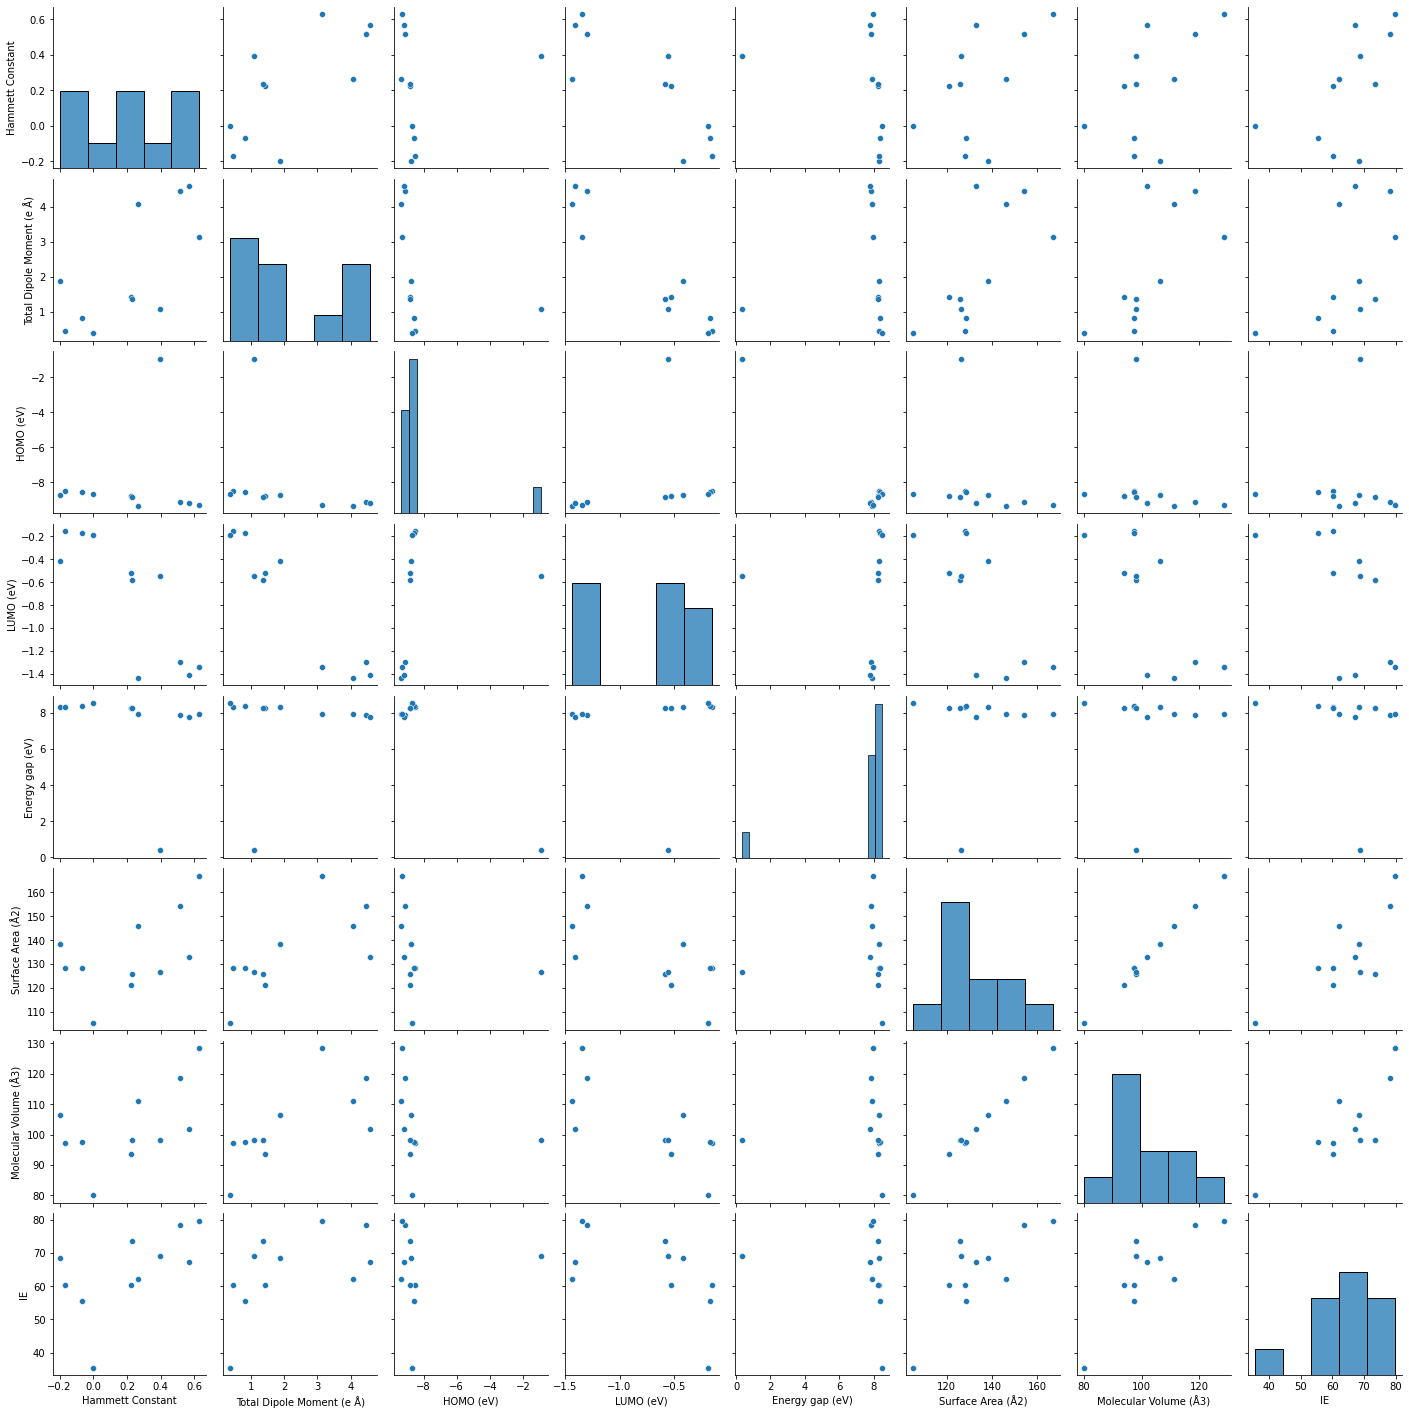

In [9]:
sns.pairplot(data_XY)

In [20]:

# Eliminate unused features: 'Name, smile, Log IE(PLS), Log IE ANN'
data_X = data[['Hammett Constant','Total Dipole Moment (e Å)','HOMO (eV)','LUMO (eV)','Energy gap (eV)','Surface Area (Å2)',
               'Molecular Volume (Å3)']]        

#extract the labels
data_Y = data['IE']              # For Target

In [21]:
# Descriptor correlation to target IE: before adding virtual samples
# =======================================================================
from scipy.stats import spearmanr  


kolom_X = ['Hammett Constant','Total Dipole Moment (e Å)','HOMO (eV)','LUMO (eV)','Energy gap (eV)','Surface Area (Å2)',
               'Molecular Volume (Å3)']

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = data_X[kolom_X[i]]
    y = data_Y
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % np.round(p,3))
    else:
        print('Samples are correlated (reject H0) p=%.3f' % np.round(p,3))
    print()

Hammett Constant :  0.645
Samples are correlated (reject H0) p=0.032

Total Dipole Moment (e Å) :  0.6
Samples are uncorrelated (fail to reject H0) p=0.051

HOMO (eV) :  -0.445
Samples are uncorrelated (fail to reject H0) p=0.170

LUMO (eV) :  -0.609
Samples are correlated (reject H0) p=0.047

Energy gap (eV) :  -0.682
Samples are correlated (reject H0) p=0.021

Surface Area (Å2) :  0.573
Samples are uncorrelated (fail to reject H0) p=0.066

Molecular Volume (Å3) :  0.791
Samples are correlated (reject H0) p=0.004



In [22]:
# ============================================
# Training and testing the Model  
# ============================================

Y_2 = data['NN Predict'].values

X = data_X.values
Y = data_Y.values

# Initialise the Scaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.fit_transform(X)  # X_normal


from sklearn.model_selection import KFold

# Split 30% : 70%
X_antara, X_test, y_antara, y_test = train_test_split(X, Y, test_size=3, random_state=1) 

kfold = KFold(n_splits=8, shuffle=True, random_state=1)

rmsec=[]
rmsecv=[]
rmse  =[]
r1=[]
for train_ix, test_ix in kfold.split(X_antara, y_antara):
    # select rows
    X_train, X_val = X[train_ix], X[test_ix]
    y_train, y_val = Y[train_ix], Y[test_ix]

    #=======================================
    
    model = KNeighborsRegressor()
    
    model.fit(X_train, y_train)
    y_pred_train  = model.predict(X_train)
    y_pred_test   = model.predict(X_test)
    y_pred_val    = model.predict(X_val)
    
    temp_rmsec    = np.sqrt(mean_squared_error(y_train, y_pred_train))
    temp_rmsecv   = np.sqrt(mean_squared_error(y_val, y_pred_val))
    temp_rmse     = np.sqrt(mean_squared_error(y_test,y_pred_test))
    temp_r1       = r2_score(y_test,y_pred_test)
    #=======================================================================================
    

    rmsec.append(temp_rmsec)
    rmsecv.append(temp_rmsecv)
    rmse.append(temp_rmse)
    r1.append(temp_r1)

#=======================================

# Training prediction
print('Training Predictions')
print('RMSECV    :',np.round(np.mean(rmsecv),3))
#print('R^2_CV    :',np.round(np.mean(r1),3))
#print('RMSE_test :',np.round(np.mean(rmse),3))

print()
print()


# Predicting all of data
# ====================================
y_pred_KNN = model.predict(X)

r2_1     = r2_score(Y,y_pred_KNN)
r2_2     = r2_score(Y,Y_2)

rmse1 = np.sqrt(mean_squared_error(Y,y_pred_KNN))
rmse2 = np.sqrt(mean_squared_error(Y,Y_2))


print('Prediction of all Data')
print('======================')
print('RMSE',str(model),' :',np.round(rmse1,3))
print('RMSE ANN             :',np.round(rmse2,3))

print()

print('R^2 ',str(model),' :',np.round(np.mean(r2_1),3))
print('R^2 ANN         :',np.round(np.mean(r2_2),3))
print()



Training Predictions
RMSECV    : 8.9


Prediction of all Data
RMSE KNeighborsRegressor()  : 12.122
RMSE ANN             : 5.836

R^2  KNeighborsRegressor()  : -0.073
R^2 ANN         : 0.751



In [23]:
# ======================================================
# HCVSG (Hamiltonian Circuit Virtual Samples Generation)
# ======================================================

X = data_X.values
Y = data_Y.values

In [24]:
def Xmin_Xmax(X):  # find the min and max values of each column
    X_min=[]
    X_max=[]
    for i in range(len(X[1,:])):              
        X_min=X_min + [np.min(X[0:, i:i+1])]  
        X_max=X_max + [np.max(X[0:, i:i+1])]  
    
    X_min=np.array(X_min)
    X_max=np.array(X_max)
    return X_min, X_max
    
def Gabung_X_Xmin_Xmax(X, X_min, X_max): 
    X = np.vstack((X,X_min))
    X = np.vstack((X,X_max))
    return X
    
def Normalisasi(X):
    scaler = MinMaxScaler()
    normal = scaler.fit_transform(X)
    return normal
    
def Split_X_Xmin_Xmax(X):
    X=X[0:-2,:]  
    return X
    
def preprosesing(X, X_min, X_max):
    Gabung = Gabung_X_Xmin_Xmax(X, X_min, X_max)
    Normal = Normalisasi(Gabung)
    Split_normal = Split_X_Xmin_Xmax(Normal)
    return Split_normal

def Denormalisasi(X_normal,X_min, X_max):
    X = np.vstack((X_min, X_max))
    scaler = MinMaxScaler()
    scaler.fit_transform(X)
    X_inv = scaler.inverse_transform(X_normal)
    return X_inv



In [25]:
X_min, X_max = Xmin_Xmax(X)  

In [26]:
regressor_Non_VSG = KNeighborsRegressor(1)
regressor_VSG = KNeighborsRegressor(1)

In [36]:
# ==========================  Searching of HCVSG ==========================

# Number of samples = 11,  training = 8 (70%),  testing = 3 (30%)
J_sampel = [8]   # number of training samples    
Batas    = 7.5 # Theta

Seed_angka = 1 + np.arange(1000)

for Jumlah_sampel in J_sampel:
        
    # ================================= Pengambilan sampel Training ====================================================\n",
    for Random_Data_Split in Seed_angka:
        
        # 1 Dtrain > 9 jalur
        Rand_D_Split  = []
        Rand_VSGP     = []
        Kinerja1 = []
        Kinerja2 = []
        Counter  = 0
        
        Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)
        x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split)
        
        x_tr   = preprosesing(x_t, X_min, X_max)
        x_test = preprosesing(x_uji, X_min, X_max)
        y_tr   = y_t.reshape(-1,1)
        y_test = y_uji.reshape(-1,1)
        
        # ==========  Predict Non VSG ===================================\n",
        regressor_Non_VSG.fit(x_tr, y_tr) #training the algorithm\n",
        y_pred_Non_VSG = regressor_Non_VSG.predict(x_test)
        # =======================================================\n",
        
        
        No_bil_acak = 1+ np.arange(500) 
        # =================================  Pengacakan posisi Array ==========================\n",
        for Random_VSGP in No_bil_acak:
            
            x_latih, y_latih = shuffle(x_tr, y_tr, random_state= Random_VSGP)   # Posisi Array diacak\n",          
            y_latih  = y_latih.reshape(-1,1)
            #agar posisi terakhir terhubung dg posisi awal\n",
            x_latih = np.vstack(([x_latih,x_latih[0]]))         
            y_latih = np.vstack(([y_latih,y_latih[0]]))
            
            Juml_fitur=len(X[0])      
            X1= np.zeros(Juml_fitur);     
            Y1=[0];  
            

            # ==================== Awal VSG      ===================================\n",


            SISIPAN = 10  
            
            for i in range (len(x_latih)-1):
                
                for j in range(SISIPAN):             
                    t=(j)/(SISIPAN)

                    temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
                    temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])

                    X1=np.vstack((X1,temp_x))  
                    Y1=np.vstack((Y1,temp_y)) 

                # ===============================================================\n",
            #===for i in range (len(x_latih)==============================\n",
            
            
            X1=X1[1:] #menghilangkan inisialisasi X[0]
            Y1=Y1[1:] #menghilangkan inisialisasi Y[0]
        
            # ============== Predict VSG =========================\n",

            regressor_VSG.fit(X1, Y1) #training the algorithm\n",
            y_pred_VSG = regressor_VSG.predict(x_test)
            # ====================================================\n",
            

            # ========================   RMSE ================================================================   \n",
            temp1 = np.sqrt(mean_squared_error(y_test,y_pred_Non_VSG))   # RMSE\n",
            temp2 = np.sqrt(mean_squared_error(y_test,y_pred_VSG))       # RMSE\n",
            # =================================================================================================\n",
            

            if (temp2 < temp1) and (temp2 < Batas):  
                Counter = Counter + 1
                Rand_D_Split.append(Random_Data_Split)
                Rand_VSGP.append(Random_VSGP)
                Kinerja1.append(np.round(temp1,3) )
                Kinerja2.append(np.round(temp2,3) )
                print('HCVSG: ',Counter)
                print('Random_Data_Split: ',Random_Data_Split)
                print('Random_HCVSG: ',Random_VSGP)
                print('RMSE of KNN: ',np.round(np.mean(temp1),3))
                print('RMSE of KNN + VSG : ',np.round(np.mean(temp2),3))
                print()
                print()
            if Counter > 9: break  # 1 Dtrain ada 10 jalur
                
            #=======================================
        # ======================= FOR Random HCVSG =========================================    
        if Counter > 9: break
        
    # ========================== FOR Random Data Split =========================================

# ========================================================================================\n",
print('Method: ', str(regressor_Non_VSG))
print('============================================')
print('number of training samples = ',J_sampel[0])
print('Threshold Theta            = ',Batas)
print('Random_Data_Split          = ',Rand_D_Split)
print('Random_HCVSG               = ',Rand_VSGP)
print('RMSE of KNN                = ',np.round(np.mean(Kinerja1),3))
print('RMSE of KNN+VSG            = ',np.round(np.mean(Kinerja2),3))
print()



HCVSG:  1
Random_Data_Split:  2
Random_HCVSG:  1
RMSE of KNN:  8.538
RMSE of KNN + VSG :  4.263


HCVSG:  2
Random_Data_Split:  2
Random_HCVSG:  2
RMSE of KNN:  8.538
RMSE of KNN + VSG :  4.263


HCVSG:  3
Random_Data_Split:  2
Random_HCVSG:  3
RMSE of KNN:  8.538
RMSE of KNN + VSG :  7.298


HCVSG:  4
Random_Data_Split:  2
Random_HCVSG:  10
RMSE of KNN:  8.538
RMSE of KNN + VSG :  7.239


HCVSG:  5
Random_Data_Split:  2
Random_HCVSG:  11
RMSE of KNN:  8.538
RMSE of KNN + VSG :  7.298


HCVSG:  6
Random_Data_Split:  2
Random_HCVSG:  12
RMSE of KNN:  8.538
RMSE of KNN + VSG :  7.298


HCVSG:  7
Random_Data_Split:  2
Random_HCVSG:  14
RMSE of KNN:  8.538
RMSE of KNN + VSG :  5.077


HCVSG:  8
Random_Data_Split:  2
Random_HCVSG:  16
RMSE of KNN:  8.538
RMSE of KNN + VSG :  4.263


HCVSG:  9
Random_Data_Split:  2
Random_HCVSG:  20
RMSE of KNN:  8.538
RMSE of KNN + VSG :  7.298


HCVSG:  10
Random_Data_Split:  2
Random_HCVSG:  21
RMSE of KNN:  8.538
RMSE of KNN + VSG :  5.077


Method:  KNe

In [1]:
'''
===========================================
Method:  KNeighborsRegressor(n_neighbors=1)
===========================================
number of training samples =  8
Threshold Theta            =  7.5
Random_Data_Split          =  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Random_HCVSG               =  [1, 2, 3, 10, 11, 12, 14, 16, 20, 21]
RMSE of KNN                =  8.538
RMSE of KNN+VSG            =  5.937
'''



'\n===========================================\nMethod:  KNeighborsRegressor(n_neighbors=1)\n===========================================\nnumber of training samples =  8\nThreshold Theta            =  7.5\nRandom_Data_Split          =  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]\nRandom_HCVSG               =  [1, 2, 3, 10, 11, 12, 14, 16, 20, 21]\nRMSE of KNN                =  8.538\nRMSE of KNN+VSG            =  5.937\n'

### A pair of Random_Data_Split and Random_HCVSG is called HCVSG, used for generate virtual samples

In [27]:
# Training 
# ==========================
X = data_X.values
Y = data_Y.values

X_normal = preprosesing(X, X_min, X_max)


Juml_fitur=len(X[0])      
X1= np.zeros(Juml_fitur);     
Y1=[0];  
rmse=[] #untuk pelatihan
R2  =[] #untuk pelatihan

# HCVSG
Random_Data_Split          =  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Random_HCVSG               =  [1, 2, 3, 10, 11, 12, 14, 16, 20, 21]

Jumlah_sampel = 8
Jumlah_sampel_test=len(X)-np.array(Jumlah_sampel)

for k in range(len(Random_HCVSG)):
    x_t, x_uji, y_t, y_uji = train_test_split(X, Y, test_size=Jumlah_sampel_test, random_state=Random_Data_Split[k]) #versi lama
     
    x_tr   = preprosesing(x_t, X_min, X_max)
    x_test = preprosesing(x_uji, X_min, X_max)
    y_tr=y_t.reshape(-1,1)
    y_test=y_uji.reshape(-1,1)


# =================================  Pengacakan posisi Array ==========================

                           
    x_, y_ = shuffle(x_tr, y_tr, random_state= Random_HCVSG[k])   # Posisi Array diacak
         
    y_latih  = y_.reshape(-1,1)
    x_latih  = x_
    #agar posisi terakhir terhubung dg posisi awal
    x_latih = np.vstack(([x_latih,x_latih[0]]))         
    y_latih = np.vstack(([y_latih,y_latih[0]]))
    
    
    # ==================== Awal VSG      ===================================
    XA= np.zeros(Juml_fitur);   #untuk pelatihan  
    YA=[0];                     #untuk pelatihan
    
    SISIPAN = 10
    for i in range (len(x_latih)-1):
        # Generate samples virtual
        for j in range(SISIPAN):             
            t=(j+1)/(SISIPAN+1)                      
            temp_x = x_latih[i] + t*(x_latih[i+1]-x_latih[i])
            temp_y = y_latih[i] + t*(y_latih[i+1]-y_latih[i])        
            #=======================================================================
                        
            X1=np.vstack((X1,temp_x))  #simpan seluruh vs
            Y1=np.vstack((Y1,temp_y))  #simpan seluruh vs
            
            XA=np.vstack((XA,temp_x))  #simpan untuk pelatihan
            YA=np.vstack((YA,temp_y))  #simpan untuk pelatihan

        # ===============================================================
    # ===================================================================
    
    
    #=== For Training =================
    XA=XA[1:] #menghilangkan inisialisasi X[0]
    YA=YA[1:] #menghilangkan inisialisasi Y[0]
    XA1=np.vstack((XA,x_tr))  # sampel virtual digabung dengan data training
    YA1=np.vstack((YA,y_tr))  # sampel virtual digabung dengan data training
    
    model = KNeighborsRegressor(1)

    # Training
    model.fit(XA1,YA1)
    
    # Testing
    y_pred=model.predict(x_test)
    temp1 = np.sqrt(mean_squared_error(y_test,y_pred))
    temp2 = r2_score(y_test,y_pred)
    rmse.append(temp1)
    R2.append(temp2)
    #============================================================
    
# ===============================================================
X1=X1[1:] #menghilangkan inisialisasi X[0]
Y1=Y1[1:] #menghilangkan inisialisasi Y[0]

X1=np.vstack((X1,x_tr))  # sampel virtual and training
Y1=np.vstack((Y1,y_tr))  # sampel virtual and training

rmse_cv = np.round(np.mean(rmse),3)  
R2_cv   = np.round(np.mean(R2),3)
print('RMSE_CV ', str(model), '+ VSG: ',rmse_cv)
#print('R-Squared     :',R2_cv)

RMSE_CV  KNeighborsRegressor(n_neighbors=1) + VSG:  6.426


### Model testing

In [28]:
model = KNeighborsRegressor()

model.fit(X1, Y1)
# ==================================================
data = pd.read_excel(r'Data_corrosion_11.xlsx')
Y_2 = data['NN Predict']  # hasil prediksi model ANN dari paper
X = data_X.values
Y = data_Y.values
X_min, X_max = Xmin_Xmax(X)
X_normal   = preprosesing(X, X_min, X_max)

# RMSE for testing
# ====================================================================================================
x_train, x_test, y_train, y_test = train_test_split(X_normal, Y, test_size=3, random_state=1)
y_pred_VSG_train = model.predict(x_train)
y_pred_VSG_test  = model.predict(x_test)
RMSE_test        = np.sqrt(mean_squared_error(y_test,y_pred_VSG_test))       # RMSE\n",
r2_test          = r2_score(y_test,y_pred_VSG_test)

# %RMSE for all of Data
# ====================================================================================================
X_normal    = preprosesing(X, X_min, X_max)
y_pred_VSG  = np.round(model.predict(X_normal).flatten(),2)


r2_1     = r2_score(Y,y_pred_VSG)
r2_2     = r2_score(Y,Y_2)

rmse1 = np.sqrt(mean_squared_error(Y,y_pred_VSG))
rmse2 = np.sqrt(mean_squared_error(Y,Y_2))


#print('============= Prediction of testing data ================')
#print('RMSE      :', np.round(RMSE_test,3))
#print('R-Squared :', np.round(r2_test,3))
print()
print('============= Prediction of all data =============')
print('RMSE HCVSG   :',np.round(rmse1,3))
print('RMSE ANN     :',np.round(rmse2,3))
print('R2 HCVSG     :', np.round(r2_1,3))
print('R2 ANN       :', np.round(r2_2,3))
print()





============= Prediction of all data =============
RMSE HCVSG   : 5.899
RMSE ANN     : 5.836
R2 HCVSG     : 0.746
R2 ANN       : 0.751



### Plotting

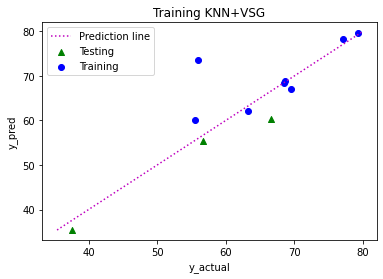

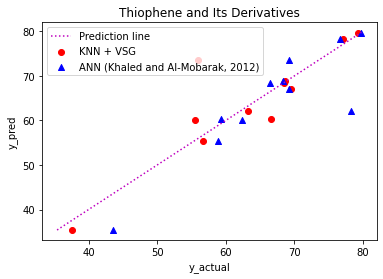

In [29]:
xline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))
yline1   = np.array(np.linspace(np.min(Y)-0.1, np.max(Y)+0.1, 150))

plt.figure()
plt.scatter(y_pred_VSG_test,y_test,    c='g', marker = '^', label = "Testing")
plt.scatter(y_pred_VSG_train,y_train , c='b', label = "Training")
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_pred") 

plt.title('Training KNN+VSG')
plt.show()

# Buat grafik VSG dan VSG utk seluruh data
plt.figure()
plt.scatter(y_pred_VSG,Y,    c='r', label = 'KNN + VSG')
plt.scatter(Y_2,Y,   c='b',  marker = '^',    label = 'ANN (Khaled and Al-Mobarak, 2012)')
plt.plot(xline1,yline1,'m', linestyle='dotted', label = "Prediction line")
    
# Create legend.
plt.legend(loc='upper left')
plt.xlabel("y_actual")
plt.ylabel("y_pred") 
judul = str(model)+'+ Virtual Samples'
plt.title('Thiophene and Its Derivatives')
plt.show()



### Histogram after adding virtual samples

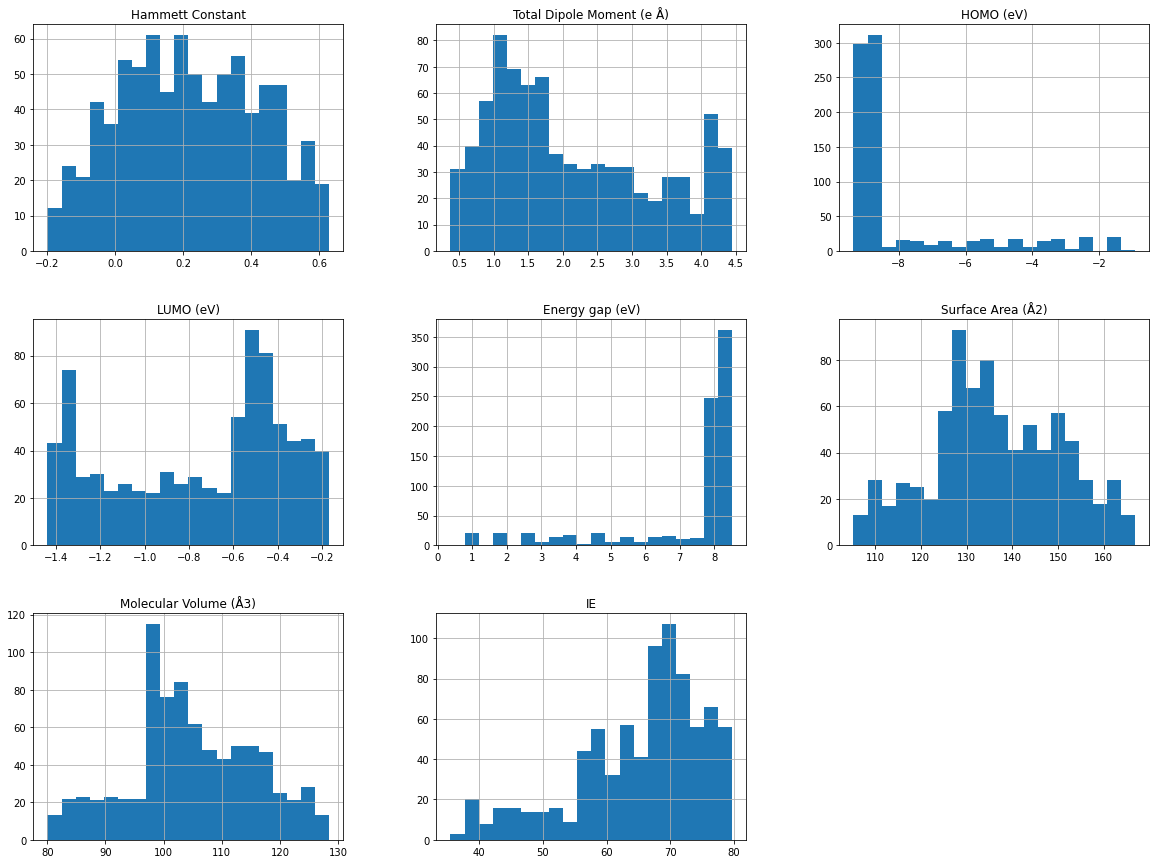

In [30]:
import pandas as pd
kolom_XY = ['Hammett Constant','Total Dipole Moment (e Å)','HOMO (eV)','LUMO (eV)','Energy gap (eV)','Surface Area (Å2)',
               'Molecular Volume (Å3)','IE']

# X1 hrs di invers supaya besarannya kembali seperti semula
X_inv=Denormalisasi(X1,X_min, X_max)
X_inv = np.round_(X_inv, decimals = 3)
Y_inv=np.round_(Y1, decimals = 3)
Data_VSG = np.hstack((X_inv,Y_inv))
Data_VSG_XY = pd.DataFrame(Data_VSG, columns=kolom_XY)
Data_VSG_XY.hist(bins=20, figsize=(20,15))
plt.show()


In [49]:
# Correlation between descriptors and targets (IE)
from scipy.stats import spearmanr  

for i in range(len(kolom_X)):
    # calculate spearman's correlation
    x = Data_VSG_XY[kolom_X[i]]
    y = Y1
    coef, p = spearmanr(x, y)
    print(kolom_X[i],': ', np.round(coef,3))
    # interpret the significance
    alpha = 0.05
    
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
        print()
    else:        
        print('Samples are correlated (reject H0) p=%.3f' % p)
        print()


Hammett Constant :  0.679
Samples are correlated (reject H0) p=0.000

Total Dipole Moment (e Å) :  0.608
Samples are correlated (reject H0) p=0.000

HOMO (eV) :  -0.26
Samples are correlated (reject H0) p=0.000

LUMO (eV) :  -0.619
Samples are correlated (reject H0) p=0.000

Energy gap (eV) :  -0.483
Samples are correlated (reject H0) p=0.000

Surface Area (Å2) :  0.695
Samples are correlated (reject H0) p=0.000

Molecular Volume (Å3) :  0.746
Samples are correlated (reject H0) p=0.000



No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 1.0, 'Distribution of energy LUMO ')

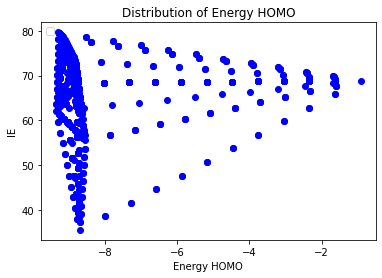

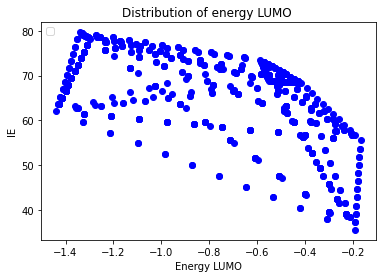

In [51]:
# Distribution of HOMO and LUMO after adding virtual samples
HOMO = Data_VSG_XY['HOMO (eV)'].values
LUMO = Data_VSG_XY['LUMO (eV)'].values
IE   = Data_VSG_XY['IE'].values

plt.figure()
plt.scatter(HOMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Energy HOMO")
plt.title('Distribution of Energy HOMO')

plt.figure()
plt.scatter(LUMO,IE,   c='b')
# Create legend.
plt.legend(loc='upper left')
plt.ylabel("IE")
plt.xlabel("Energy LUMO")
plt.title('Distribution of energy LUMO ')


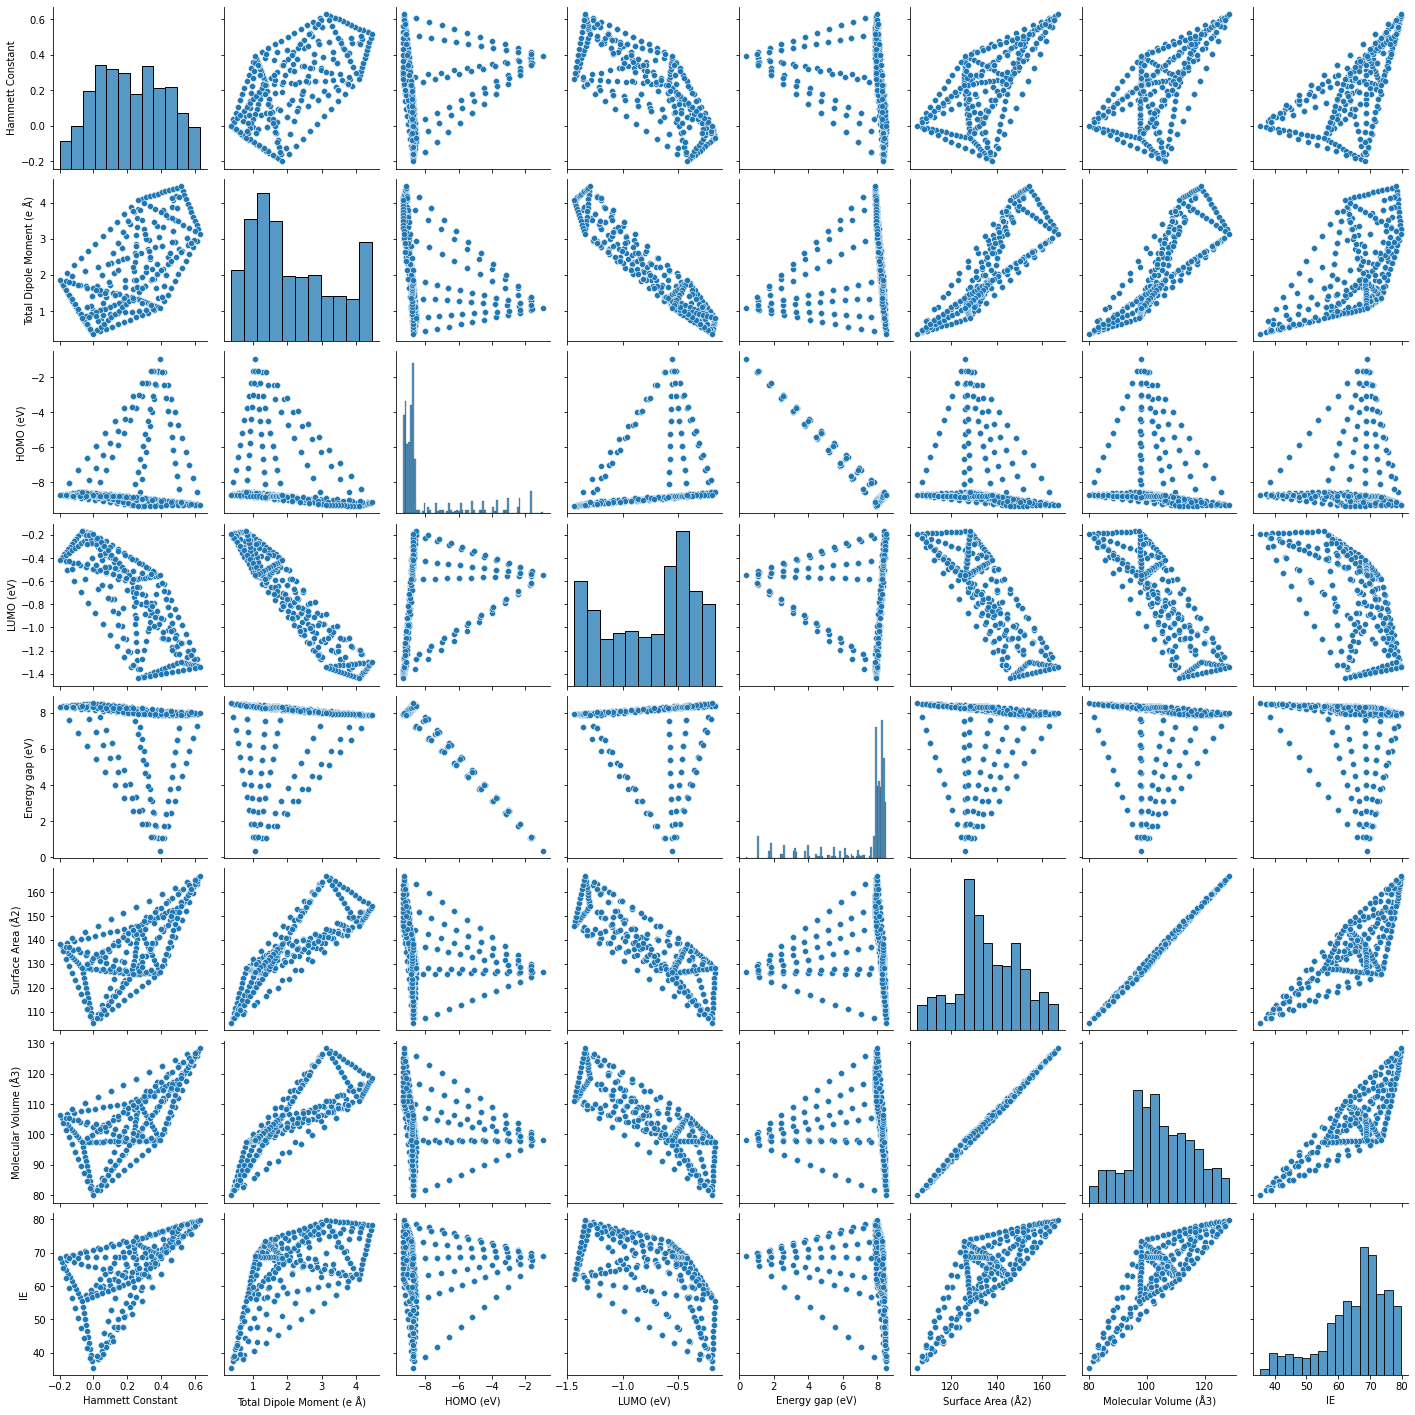

In [53]:
sns.pairplot(Data_VSG_XY)